In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
esg = pd.read_excel('esg_final_with_dummy.xlsx')
esg

,Unnamed: 0,company,code,esg,e,s,g,AV,ret,sector,...,sector_num,sector_count,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
0,0,BNK금융지주,138930,6,4,6,6,1.851312e+12,-0.000826,기타 금융업,...,2,83,1,0,0,0,0,0,0,0
1,1,DGB금융지주,139130,6,5,6,6,1.148500e+12,0.000187,기타 금융업,...,2,83,1,0,0,0,0,0,0,0
2,2,JB금융지주,175330,6,5,5,6,1.110984e+12,0.000460,기타 금융업,...,2,83,1,0,0,0,0,0,0,0
3,3,KB금융,105560,6,6,6,6,1.804606e+13,0.000152,기타 금융업,...,2,83,1,0,0,0,0,0,0,0
4,4,S-Oil,10950,6,5,6,6,7.790729e+12,-0.000677,석유 정제품 제조업,...,9,314,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,556,화인베스틸,133820,3,3,2,3,8.141025e+10,0.001232,1차 철강 제조업,...,9,314,0,0,0,0,0,0,0,1
557,557,환인제약,16580,3,1,4,4,3.106212e+11,0.000549,의약품 제조업,...,9,314,0,0,0,0,0,0,0,1
558,558,휴온스,243070,3,1,4,3,6.106300e+11,0.001476,의약품 제조업,...,9,314,0,0,0,0,0,0,0,1
559,559,휴온스글로벌,84110,3,1,4,3,3.353257e+11,-0.000060,의약품 제조업,...,9,314,0,0,0,0,0,0,0,1


In [ ]:
grade_mapper = {6 : 120, 5 : 110, 4 : 100, 3 : 90, 2 : 80, 1 : 70}
esg['e'] = esg['e'].map(grade_mapper)
esg['s'] = esg['s'].map(grade_mapper)
esg['g'] = esg['g'].map(grade_mapper)
esg['esg'] = esg['esg'].map(grade_mapper)
esg.head()

,Unnamed: 0,company,code,esg,e,s,g,AV,ret,sector,...,sector_num,sector_count,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
0,0,BNK금융지주,138930,120,100,120,120,1.851312e+12,-0.000826,기타 금융업,...,2,83,1,0,0,0,0,0,0,0
1,1,DGB금융지주,139130,120,110,120,120,1.148500e+12,0.000187,기타 금융업,...,2,83,1,0,0,0,0,0,0,0
2,2,JB금융지주,175330,120,110,110,120,1.110984e+12,0.000460,기타 금융업,...,2,83,1,0,0,0,0,0,0,0
3,3,KB금융,105560,120,120,120,120,1.804606e+13,0.000152,기타 금융업,...,2,83,1,0,0,0,0,0,0,0
4,4,S-Oil,10950,120,110,120,120,7.790729e+12,-0.000677,석유 정제품 제조업,...,9,314,0,0,0,0,0,0,0,1


In [ ]:
esg.groupby('sector_class')['sector_class'].count()

sector_class
건설업                          18
금융 및 보험업                     83
도매 및 소매업                     41
사업시설 관리, 사업 지원 및 임대 서비스업      6
운수 및 창고업                     20
전기, 가스, 증기 및 공기 조절 공급업       10
전문, 과학 및 기술 서비스업             23
정보통신업                        48
제조업                         312
Name: sector_class, dtype: int64

In [ ]:
esg.columns

Index(['Unnamed: 0', 'company', 'code', 'esg', 'e', 's', 'g', 'AV', 'ret',
       'sector', 'sector_class', 'AV_log', 'ret_group', 'sector_num',
       'sector_count', 'sector_2', 'sector_3', 'sector_4', 'sector_5',
       'sector_6', 'sector_7', 'sector_8', 'sector_9'],
      dtype='object')

In [ ]:
esg = esg.dropna()
len(esg)

559

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
esg.head()

,Unnamed: 0,company,code,esg,e,s,g,AV,ret,sector,...,sector_num,sector_count,sector_2,sector_3,sector_4,sector_5,sector_6,sector_7,sector_8,sector_9
0,0,BNK금융지주,138930,120,100,120,120,1.851312e+12,-0.000826,기타 금융업,...,2,83,1,0,0,0,0,0,0,0
1,1,DGB금융지주,139130,120,110,120,120,1.148500e+12,0.000187,기타 금융업,...,2,83,1,0,0,0,0,0,0,0
2,2,JB금융지주,175330,120,110,110,120,1.110984e+12,0.000460,기타 금융업,...,2,83,1,0,0,0,0,0,0,0
3,3,KB금융,105560,120,120,120,120,1.804606e+13,0.000152,기타 금융업,...,2,83,1,0,0,0,0,0,0,0
4,4,S-Oil,10950,120,110,120,120,7.790729e+12,-0.000677,석유 정제품 제조업,...,9,314,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
"""가지고 있는 표본에서 80%를 학습시켜서 나머지 20%로
학습한 예측 모델이 얼마나 정확한지를 보고자 함.
독립변수는 esg, 각 e,s,g, 섹터 더미변수이며 종속변수는 ret값이다."""

x = esg[['esg', 'e', 's', 'g',
       'AV_log', 'sector_2', 'sector_3', 'sector_4', 'sector_5',
       'sector_6', 'sector_7', 'sector_8', 'sector_9']]

y = esg[['ret']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

esg_model = LinearRegression()
esg_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_predict = esg_model.predict(x_test)

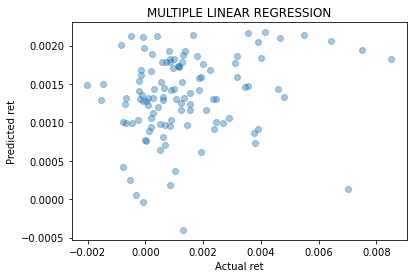

In [ ]:
#가지고 있는 표본을 바탕으로는 전혀 예측을 못 하는 것으로 보인다.
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual ret")
plt.ylabel("Predicted ret")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()